In [71]:
from tdw_dataset import *
from model import *
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [72]:
# Hyperparameters.
seed = 0
batch_size = 4
num_slots = 7
num_iterations = 3
resolution = (128, 128)

In [73]:
resolution = (512, 512)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 128, output_channels=4).float().cuda()

In [74]:
data = DataLoader(TDWDataset("/om2/user/yyf/tdw_playroom_small", training=False), batch_size=batch_size)

In [75]:
batch = next(iter(data))

In [86]:
im1 = batch[0].cuda() / 255.
print(im1.shape)

torch.Size([4, 3, 512, 512])


In [100]:
from tqdm import tqdm
optim = torch.optim.Adam(params=model.parameters(), lr=2e-4)
losses = []
optim.lr = 0
for i in tqdm(range(10000)):
    optim.zero_grad()
    recon_combined, recons, masks, slots  = model(im1)
    loss = F.mse_loss(recon_combined, im1)
    losses.append(loss.item())
    if i % 10 == 0 and optim.lr < 2e-4:
        optim.lr += 0.00001
    if i % 100 == 0:
        print(loss.item())

    loss.backward()
    optim.step()

  0%|                                                                  | 1/10000 [00:00<1:52:10,  1.49it/s]

0.008008627220988274


  1%|▋                                                               | 101/10000 [02:27<4:03:18,  1.47s/it]

0.007795901969075203


  2%|█▎                                                              | 201/10000 [04:54<4:00:42,  1.47s/it]

0.006838716100901365


  3%|█▉                                                              | 301/10000 [07:22<3:57:58,  1.47s/it]

0.0063914088532328606


  4%|██▌                                                             | 401/10000 [09:49<3:55:54,  1.47s/it]

0.006598583422601223


  5%|███▏                                                            | 501/10000 [12:16<3:52:50,  1.47s/it]

0.0054253689013421535


  6%|███▊                                                            | 601/10000 [14:43<3:50:31,  1.47s/it]

0.005093916319310665


  7%|████▍                                                           | 701/10000 [17:10<3:47:47,  1.47s/it]

0.00494367815554142


  8%|█████▏                                                          | 801/10000 [19:38<3:46:25,  1.48s/it]

0.004430752247571945


  9%|█████▋                                                          | 892/10000 [21:53<3:43:32,  1.47s/it]


KeyboardInterrupt: 

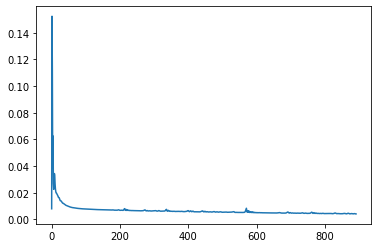

In [101]:
plt.plot(losses)

In [102]:
recon_combined.shape, recons.shape, masks.shape, slots.shape

(torch.Size([4, 3, 512, 512]),
 torch.Size([4, 7, 512, 512, 3]),
 torch.Size([4, 7, 512, 512, 1]),
 torch.Size([28, 8, 8, 128]))

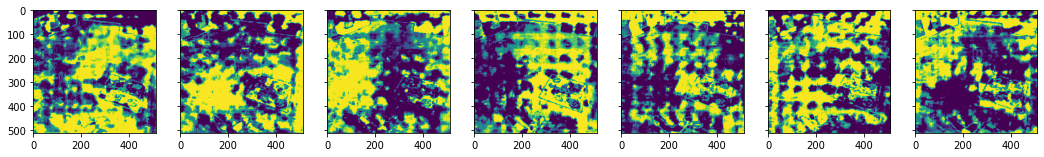

In [123]:
idx = 2
fig, axs = plt.subplots(1, masks.shape[1], figsize=(18, 12), sharey=True, sharex=True)
for i in range(masks.shape[1]):
    mask = masks[idx, i].detach().cpu().numpy()
    mask[np.where(mask < mask.mean())] = 0
    axs[i].imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


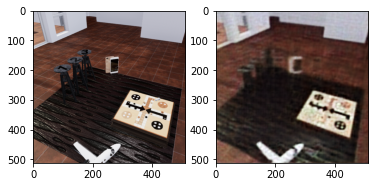

In [106]:
fig, axs = plt.subplot_mosaic("AB")
axs["A"].imshow(im1[idx].detach().cpu().squeeze(0).numpy().transpose(1, 2, 0))
axs["B"].imshow(recon_combined[idx].detach().cpu().squeeze(0).numpy().transpose(1, 2, 0))


In [ ]:
resolution = (512, 512)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 32, output_channels=4).float().cuda()
